In [2]:
from keras.datasets import reuters
(train_data,train_labels) , (test_data,test_labels) = reuters.load_data(num_words = 10000)


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[10]

3

In [8]:
import numpy as np

def vectorize_sequence(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        results[i , sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding.
-----

In [9]:
# Vectorizing the integer using One Hot Encoding. One hot encoding of labels
# consist of embedding each label as an all zero vector with a 1 in the place of the label index

def to_one_hot(labels , dimension=46):
    results = np.zeros((len(labels),dimension))
    for i , label in enumerate(labels):
        results[i,label] = 11.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [10]:
# there is a short cut method to do so
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
# Building the Network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


In [12]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy' , 
             metrics = ['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 12s 53ms/step - loss: 3.0729 - accuracy: 0.4307 - val_loss: 1.6877 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 1.4788 - accuracy: 0.6918 - val_loss: 1.2889 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.0609 - accuracy: 0.7808 - val_loss: 1.1200 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8329 - accuracy: 0.8210 - val_loss: 1.0283 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6864 - accuracy: 0.8544 - val_loss: 0.9680 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.5581 - accuracy: 0.8815 - val_loss: 0.9271 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 0.4331 - accuracy: 0.9124 - val_loss: 0.8998 - val_accuracy: 0.8160
Epoch 8/20
1

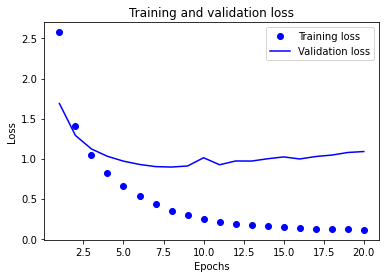

In [15]:
# Now Lets Plot the training and validaiton loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs , loss , 'bo',label = 'Training loss')
plt.plot(epochs, val_loss , 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


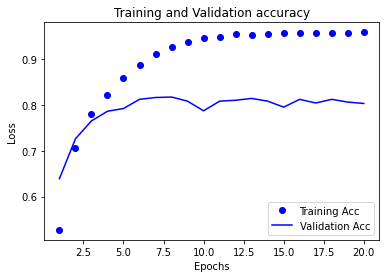

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'bo',label = 'Training Acc')
plt.plot(epochs,val_acc , 'b',label = 'Validation Acc')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 45ms/step - loss: 3.0685 - accuracy: 0.3732 - val_loss: 1.7029 - val_accuracy: 0.6320
Epoch 2/9
16/16 [==============================] - 0s 24ms/step - loss: 1.4531 - accuracy: 0.6986 - val_loss: 1.3277 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 0s 24ms/step - loss: 1.1090 - accuracy: 0.7680 - val_loss: 1.1771 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 0s 24ms/step - loss: 0.8783 - accuracy: 0.8156 - val_loss: 1.0618 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 25ms/step - loss: 0.6951 - accuracy: 0.8579 - val_loss: 1.0177 - val_accuracy: 0.7840
Epoch 6/9
16/16 [==============================] - 0s 24ms/step - loss: 0.5427 - accuracy: 0.8899 - val_loss: 0.9613 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 0s 24ms/step - loss: 0.4432 - accuracy: 0.9077 - val_loss: 0.9311 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

In [18]:
results

[1.0018565654754639, 0.7853962779045105]

In [19]:
# Genertating the prediction on new data

In [20]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [21]:
np.sum(predictions[4])

1.0000001

In [22]:
np.argmax(predictions[0])

3

Because the final outputs are 46-dimensional, you should void intermediate layers with many fewer than 46 hidden units. Now let’s see what appens when you introduce an information bottleneck by having intermediate layers-that are significantly less than 46-dimensional: for example, 4-dimensional.
--------------

In [37]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 512,
         validation_data = (x_val,y_val))
          


Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 3.3150 - accuracy: 0.4261 - val_loss: 2.3472 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 2.0989 - accuracy: 0.6464 - val_loss: 1.7771 - val_accuracy: 0.6550
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5452 - accuracy: 0.7159 - val_loss: 1.4650 - val_accuracy: 0.6960
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 1.2251 - accuracy: 0.7597 - val_loss: 1.2786 - val_accuracy: 0.7350
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0269 - accuracy: 0.7971 - val_loss: 1.1625 - val_accuracy: 0.7450
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8794 - accuracy: 0.8186 - val_loss: 1.0721 - val_accuracy: 0.7710
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7499 - accuracy: 0.8532 - val_loss: 1.0083 - val_accuracy: 0.7860
Epoch 8/20
16